In [10]:
import os
import glob
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
exec_time_dir = os.path.join('data', 'exec_time')

In [4]:
assert os.path.exists(exec_time_dir)

In [5]:
exec_time_files = glob.glob(os.path.join(exec_time_dir, '*.csv'))

In [6]:
exec_time_files

['data/exec_time/aws_16gb_2024-09-17T22:50:30.815380.csv']

In [19]:
import wave
import contextlib
def get_audio_duration(fname) -> float:
    with contextlib.closing(wave.open(fname,'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
    return duration

In [20]:
driving_files = glob.glob('data/driving/*.wav')

In [24]:
driving_duration_mapper = {
    os.path.splitext(os.path.basename(f))[0]: get_audio_duration(f)
    for f in driving_files
}

In [25]:
driving_duration_mapper

{'maduro_rvc_5millones_v2': 3.92,
 'girl_talk_emotion': 4.608,
 'man_run': 15.04,
 'maduro_audio_tts': 7.54,
 'milei_test': 9.98,
 'torrijos_test': 12.46,
 'maduro_rvc_5millones': 4.94,
 'spanish_test': 8.5}

In [26]:
data = pd.concat([pd.read_csv(f) for f in exec_time_files])

In [28]:
data['driving_duration'] = data['driving'].map(driving_duration_mapper)

In [29]:
data.groupby('source')['time'].describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
00082-2,8.0,937.897610,405.804700,500.163928,566.069823,897.633788,1158.948504,1620.139946
SquareMaduroMic1768,8.0,935.887851,404.883559,500.079927,565.235566,894.387479,1156.680200,1621.224255


In [30]:
data.groupby('driving')['time'].describe()

,count,mean,std,min,25%,50%,75%,max
driving,,,,,,,,
girl_talk_emotion,2.0,565.200236,0.322243,564.972376,565.086306,565.200236,565.314166,565.428097
maduro_audio_tts,2.0,829.017127,0.828807,828.431071,828.724099,829.017127,829.310154,829.603182
maduro_rvc_5millones,2.0,565.803514,0.679131,565.323296,565.563405,565.803514,566.043623,566.283732
maduro_rvc_5millones_v2,2.0,500.121927,0.059398,500.079927,500.100927,500.121927,500.142928,500.163928
man_run,2.0,1620.682101,0.766722,1620.139946,1620.411023,1620.682101,1620.953178,1621.224255
milei_test,2.0,1089.972306,0.034077,1089.948210,1089.960258,1089.972306,1089.984354,1089.996402
spanish_test,2.0,963.004141,3.762167,960.343887,961.674014,963.004141,964.334268,965.664395
torrijos_test,2.0,1361.340491,6.517964,1356.731595,1359.036043,1361.340491,1363.644940,1365.949388


<Axes: xlabel='time', ylabel='Count'>

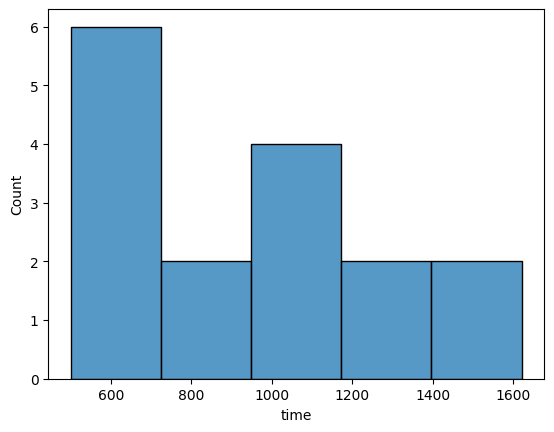

In [31]:
sns.histplot(data['time'])

<Axes: xlabel='driving_duration', ylabel='time'>

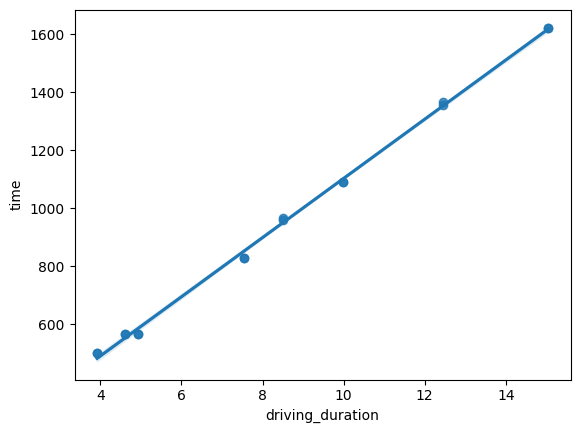

In [32]:
sns.regplot(x='driving_duration', y='time', data=data)

In [34]:
from scipy.stats import linregress

In [35]:
linear_model = linregress(data['driving_duration'], data['time'])

In [37]:
linear_model.slope

102.0641788898546

In [43]:
from datetime import timedelta, datetime

In [47]:
(datetime.min + timedelta(seconds=linear_model.slope + linear_model.intercept)).time()

datetime.time(0, 3, 4, 322507)

In [68]:
import numpy as np

Text(0, 0.5, 'execution duration (min)')

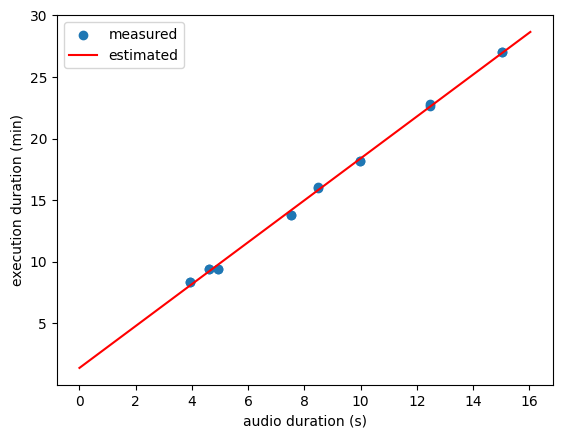

In [69]:
full_duration_axis = np.linspace(0, data['driving_duration'].max() + 1)
estimated_time = full_duration_axis * linear_model.slope + linear_model.intercept
f, ax = plt.subplots()
ax.scatter(data['driving_duration'], data['time'] / 60, label='measured')
ax.plot(full_duration_axis, estimated_time / 60, color='red', label='estimated')
ax.legend()

ax.set_xlabel('audio duration (s)')
ax.set_ylabel('execution duration (min)')
